# 5장 가설 검정

## 1. 가설검정: 차이가 있는지를 판정한다.

* 관측된 여러 값의 평균이나 분산 사이의 차이가 모집단에도 있다고 해도 될지의 여부를 판정한다.
* 비교할 통계량의 종류에 따라 여러가지 검정이 있다.


**표본의 수에 따른 검정 분류**

* 특정 값과 표본통계량의 검정(one sample test): '관측된 한 개의 표본통계량'을 이미 알고 있는 '특정 통계량'과 비교한 다음, 이들이 모집단에서도 다른지를 확률적으로 판정하는 방법
* 두 집단의 검정(two sample test): 조건이나 처리에 따라 **두 그룹**으로 나누었을 때, 관측된 두 표본통계량이 모집단에서도 다를지를 확률적으로 판정하는 방법


**일표본 검정 (One sample test)**

* 특정 값과 표본평균의 검정
    * 카탈로그에 게재되어 있는 A차종의 연비와 사용자가 계측한 실제 연비에 차이가 있을까?
* 특정 비율과 표본비율의 검정
    * 지지율이 30% 이하로 내려가면 내각을 해산하고 싶은데, 설문조사에서는 지지율이 20%였다. 과연 해야해야 마땅할까?
* 특정 분산과 표본분산의 검정
    * 어느 생산 라인에서 제조된 과자 한 봉지의 용량이 허용 기준에 못 미칠까?
* 무상관 검정
    * 운동량과 몸무게 사이에 음의 상관관계가 있을까?

**이표본 검정 (Two sample test)**

* 평균 차이 검정
    * 남자와 여자의 성적은 차이가 있을까?
* 등분산 검정
    * 공장 A에서 제조된 나사와 공장 B에서 제조된 나사 길이의 분산은 차이가 있을까?
* 비율 차이 검정
    * A라인에서 제조된 액정 패널과 B라인에서 제조된 액정 패널은 수율에 차이가 있을까?

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# 특정 값과 표본평균의 검정 (One sample test)
np.random.seed(6) # 재현성을 위한 random seed 고정

# 모집단
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

# 표본집단(미네소타)
minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

# 표본평균과 모평균 검정
stats.ttest_1samp(a= minnesota_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

43.000112
39.26


Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

## 2. 귀무가설과 대립가설: 두 가설

* 검정에서는 모집단에 관한 가설이 옳은지를 확률적으로 판정하기 위해 어떤 가설을 세울 것인지가 아주 중요하다.

**귀무가설 $H_0$(Null hypothesis, 영가설)**

* 연구에서 주장하고 싶은 내용과는 반대되는 가설.
* '차이가 없다'거나 '처리 효과가 없다'와 같은 내용이며, 검정은 이 가설을 반증해보는 것이다.

**대립가설 $H_1$ (Alternative hypothesis)** 

* 귀무가설을 기각할 수 있는 충분한 근거를 얻었을 때 우리가 주장하고자 하는 내용을 **대립가설**이라고 한다.
* 가설 검정 결과를 해석하는 데에 있어서 주의할 점은 '귀무가설/대립가설을 채택한다'라고 해석하는 것이 편하기는 하나 이는 **틀린** 해석이다.
* **귀무가설을 기각할 충분한 근거를 얻었다/얻지 못했다** 고 해석하는 것이 보다 옳은 해석이라고 할 수 있다. 그 이유는 현재 이용한 표본집단에서는 해당하는 결과를 얻었지만 다른 집단을 선택한다면 또 이와는 다른 결과를 얻을 수도 있기 때문이다.


**예제**: 위의 예제를 이용한 가설 설정 및 해석
* 가설 설정
    * $H_0$: 미네소타 주에 사는 사람의 평균 연령은 미국 전체 인구의 평균 연령과 차이가 없다.
    </br>$(H_0: \bar{X}_{MN} = \bar{X}_{USA})$
    * $H_1$: 미네소타 주에 사는 사람의 평균 연령은 미국 전체 인구의 평균 연령과 차이가 있다.
    </br>$(H_1: \bar{X}_{MN} \ne \bar{X}_{USA})$
    
* 가설 검정 결과
    * 유의수준 $\alpha$ = 0.05 일 때, 검정의 유의확률 p-value = 0.013 이 유의수준보다 작기 때문에 미네소타주에 사는 사람의 평균 연령과 미국 전체 인구의 평균 연령은 차이가 있다고 할 충분한 근거를 얻었다고 할 수 있다.


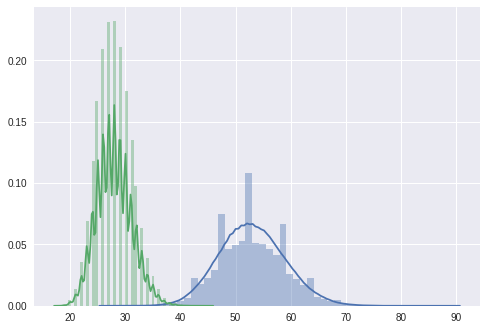

In [2]:
import seaborn as sns

# 미국 전체 인구와 미네소타 주민의 나이 분포도
sns.distplot(population_ages1) # US
sns.distplot(population_ages2) # MN

plt.show()

## 3. 가설검정 절차

* 관측된 데이터로부터 모집단에 대한 가설을 설청하고 표본을 통해 얻는 정보에 따라 그 타당성을 검증한다.


### 주의할 점

**귀무가설을 채택(='차이가 없다'고 판정) 해서는 안된다.** 

귀무가설(차이가 없다)이 기가되었을 때 귀무가설은 옳지 않다. 즉, '차이가 없는 것은 아니다(=차이가 없다)'고 해석하지만, 귀무가설이 기가되지 않았을 때의 해석에는 주의할 필요가 있다.

귀무가설이 기각되지 않더라도 귀무가설을 채택해서 그 내용(차이가 없다)이 옳다고 판정해서는 안 된다. 왜냐하면 실험을 다시 하거나 데이터를 늘리면 귀무가설을 기각할 수 있을지도 모르기 때문이다. 우선 이번 실험에서 관측한 데이터에서는 유의미한 차이가 검출되지 않았을 뿐일 수 있다. 그러므로 **귀무가설이 기각되지 않은 경우라도 채택하지 않고 '판정을 보류'해 두는** 것이 좋다.

이와 같이 가설검정은 어디까지나 '귀무가설을 기각'하기 위한 절차일 뿐, 귀무가설이 옳다는 것을 증명하기 위한 것이 아니다. 

## 4. 특정값(모평균)과 표본평균 검정

* '관측된 표본평균'을 이미 알고 있는 '특정값'과 비교하고, 두 값이 같을지 다를지를 확률로 판정한다.
* 한 표본의 평균검정, 한 샘플 검정, 모평균 검정 등으로 불리기도 한다.

### '가설'에 대해 생각해 보기**

* 귀무가설 $H_0 : \mu_0 = \mu_1$

* 대립가설 $H_1 : \mu_0 \ne \mu_1$

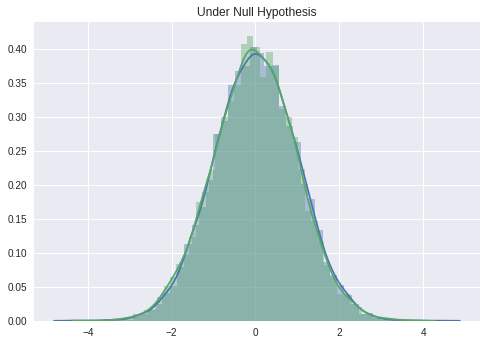

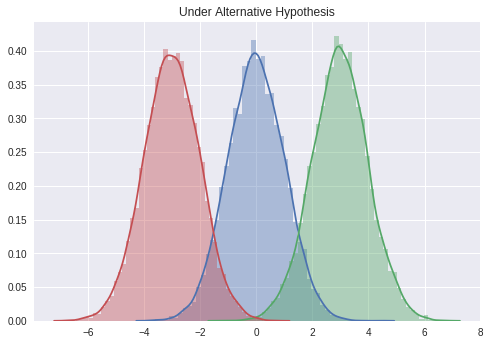

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns

# 특정 값과 표본평균의 검정 (One sample test)
np.random.seed(6) # 재현성을 위한 random seed 고정


# 귀무가설: 비교대상인 특정값과 같은 모집단에서 표본이 추출되었다고 생각한다.
sample0 = stats.norm.rvs(size = 10000)
sample1 = stats.norm.rvs(size = 10000)

sns.distplot(sample0)
sns.distplot(sample1)
plt.title('Under Null Hypothesis')
plt.show()

# 대립가설: 특정값과는 다른 모집단에서 표본을 추출했다고 생각한다.
sample0 = stats.norm.rvs(size = 10000)
sample1 = stats.norm.rvs(size = 10000, loc = 3)
sample2 = stats.norm.rvs(size = 10000, loc = -3)

sns.distplot(sample0)
sns.distplot(sample1)
sns.distplot(sample2)
plt.title('Under Alternative Hypothesis')
plt.show()


### '검정'에 대해 생각해보기**

* 비교 대상이 되는 '특정값'과 '관측된 표본의 평균'의 차이가 오차 범위 내라고 말할 수 있는지 어떤지를 생각한다.

### '판정'에 대해 생각해보기

* '이것보다도 표본평균이 크다면 귀무가설을 기각할만한 증거가 충분하다'고 하는 **한계값**(또는 **임계값**)을 **유의수준**으로 계산한다.
* 한계값과 관측된 표본평균 $\bar{X}_1$ 를 비교한다.

### 유의수준

* 어느 정도의 정확도로 귀무가설을 기각할지를 **유의수준** (유의 확률은 $\alpha$ 로 나타낸다)으로 해서 정해둔다. 보통은 분포의 양측에서 5% (= 한쪽 2.5%) 로 한다.
* 다시 말하면 이 검정에서 허용할 수 있는 제1종 과오(Type I Error, 84쪽)의 확률이다.
* 판정기준이 되는 한계값은 이 유의수준 범위의 경계로 설정한다.

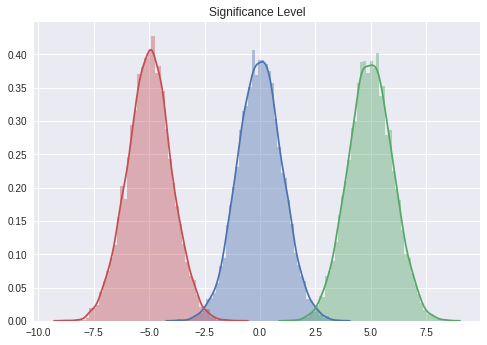

In [4]:
# 대립가설: 특정값과는 다른 모집단에서 표본을 추출했다고 생각한다.
sample0 = stats.norm.rvs(size = 10000)
sample1 = stats.norm.rvs(size = 10000, loc = 5)
sample2 = stats.norm.rvs(size = 10000, loc = -5)

sns.distplot(sample0)
sns.distplot(sample1)
sns.distplot(sample2)
plt.title('Significance Level')
plt.show()

### 양측검정과 단측(편측)검정

* 보통은 위의 그림과 같은 **양측검정**을 생각하지만, 다음과 같은 경우에는 단측의 확률만으로 $\alpha$ 로 하는 **편측검정**을 사용하기도 한다.
    1. 대립가설(표본평균)의 분포가 귀무가설(특정값)의 분포보다 커진다(혹은 작아진다)는 것을 알고 있는 경우
    2. 어느 방향의 유의 차에만 관심이 있는 경우(100쪽의 비열성 시험 등). 편측검정의 가설은 아래와 같아져 양측검정보다도 귀무가설을 기각하기 쉬워진다. </br>
    $ H_0: \mu_0 >= \mu_1, \quad H_1: \mu_0 < \mu_1$ </br>
    $ H_0: \mu_0 <= \mu_1, \quad H1: \mu_0 > \mu_1$
    
### 한계값의 계산 (정규분포)

* 모분산을 이미 알고 있을 경우, 한계값은 정규분포로 계산한다.
* 다만 대표본이라면 모분산을 몰라도 표본분산으로 대신할 수 있다.
* 정규분포를 사용한 모평균의 구간추정에서 하는 신뢰한계의 계산과 같은 내용이다.

### 귀무가설의 판정 (정규분포)

* 유의수준 $\alpha$ = 0.05 의 양측검정에 대해서 우측만 설명하자면 아래와 같다.
    * 표본평균 < 한계값: 이번에 관측된 표본평균과 특정 값의 사이에서 통계적으로 유의한 차이는 확인할 수 없었다.
    * 표본평균 > 한계값: 관측된 표본평균과 특정 값의 사이에는 통계적으로 의미 있는 차이가 있었다.
    
### Z 검정

* 표본평균을 표준화한 Z 분포를 사용해서 검정할 수도 있다. 이쪽도 앞 페이지의 정규분포와 마찬가지로 모분산을 알고 있어야 한다.
* 표준오차가 1로 표준화되어 있으므로 한계값은 보다 단순해진다(다만 검정통계량 z를 계산할 필요가 생기므로 검정이 수월하지는 않다).
    * $Z_{\bar{X}} = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$: 표본평균과 모평균의 차이를 모표준오차로 나눈 값.
    
### t 검정

* 보통은 모분산을 모르므로 표본평균을 스튜던트화한 t 분포를 사용해 검정한다(자유도 df 는 n-1 이다).
    * $t_{\bar{X}} = \frac{\bar{X} - \mu}{s / \sqrt{n - 1}}$
* 자유도가 작아질수록 귀무가설은 기각하기 어려워진다.  

### p값 (p-value)

* p값이란 귀무가설 하의 분포에서, 검정통계량보다 극단적인 값이 관측된 확률을 말한다.
* 다시 말하면 귀무가설을 기각할 수 있는 가장 낮은 유의수준이므로 보통은 작은 쪽이 바람직하다.
* 논문 등에서는 검정 결과뿐만 아니라 p-값도 나타내 두는 것이 좋다(일반적인 소프트웨어에서는 양측검정의 경우에는 자동적으로 양 꼬리를 합친 확률을 출력해준다.)

## 5. 가설검정의 두 오류: 제1종 오류와 제2종 오류

* 가설검정은 표본을 사용하기 때문에 판정을 잘못할 수도 있다.
* 잘못(과오, 오류)의 내용에 따라 이는 두 종류로 나뉜다.

### 제1종 오류

* **제1종 오류**란 사실은 차이가 없는데 그 진실을 못보고 '차이가 있다'고 판정해버리는 것이다.
* 제1종 오류를 범할 확률(위험률)의 허용 한계를 $\alpha$ 로 나타낸다.
* 위양성(False Positive) 라고도 한다.

### 제2종 오류

* **제2종 오류**란 차이가 없는 것은 잘못임에도 불구하고 그 잘못을 못보고 지나쳐 '차이가 없다'고 판정해버리는 것이다.
* 제2종 오류를 범할 확률을 $\beta$ 로 표시한다.
* 위음성(False Negative) 라고도 한다.

### 검정력(Power)

* **검정력**은 차이가 있는 경우에 정확히 차이가 있다고 판정할 수 있는 능력, 즉 그 검정이 얼마나 뛰어난지를 나타낸다.
* 제2종 오류를 범하지 않을 확률이므로 $1 - \beta$ 로 나타낸다.
* 코엔이라는 통계학자는 검정력이 0.8 이상은 되어야한다고 말했다. 이것은 100회 검정을 했다면 80회는 원래의 차이를 검출할 수 있는 능력을 말한다.

## 6. 모비율과 표본비율 검정

* '관측된 표본비율'을 모비율과 비교하고, 그것이 다른지 아닌지를 정규분포를 사용해 판정한다.

### 가설

* $H_0 : p = p_0$ 표본비율과 모비율에 차이가 없다.
* $H_1 : p \ne p_0$ 표본비율과 모비율에 차이가 있다.

### 검정통계량 (정규분포)

* 대표본 ($n \ge 100$) 일 때, 표본비율 $\hat{p}$ 는 정규분포를 따른다.

### 귀무가설 판정

* 상측에서 검정통계량 > 상한값, 하측에서 검정통계량 < 하한값 혹은 p-value $ < \alpha$ 라면 귀무가설을 기각할 충분한 증거가 있다고 할 수 있다.
* 한계값 = $p_0 \pm z_{\alpha / 2} \sqrt{\frac{p_0(1 - p_0)}{n}} $

## 7. 모분산과 표본분산 검정

* '관측된 표본분산'을 모분산과 비교하고 그것이 다른지 아닌지를 $\chi^2$ 분포를 사용해서 판정한다.

### 가설

* $H_0: \sigma^2 = \sigma_0^2 $, 표본분산과 모분산에는 차이가 없다.
* $H_1: \sigma^2 \ne \sigma_0^2 $ 표본분산과 모분산에는 차이가 있다.

### 검정통계량 ($\chi^2 값$)

* 표본분산을 $\chi^2$ 분포를 따르는 통계량으로 변환한다.

### 귀무가설 판정

* 상측에서 검정통계량 > 상한값, 하측에서 검정통계량 < 하한값, 혹은 p-value $ < \alpha$라면 귀무가설을 기각할 충분한 증거가 있다고 할 수 있다.

## 8. 무상관 검정: 정말 상관관계가 있는가?

* '관측된 상관계수'를 무산관과 비교하고, 그것이 다른지 아닌지를 t 분포를 사용해 판정한다.

### 가설

* $H_0: \rho = 0$ 모상관계수가 0이다.
* $H_1: \rho \ne 0$ 모상관계수가 0이 아니다.

### 검정통계량 (t 분포)

* 귀무가설 하에서 스튜던트화한 표본상관계수 $t_r$ 은 자우도가 $n-2$ 인 t 분포를 따른다.
* $T = \frac{r -\rho }{\sqrt{\frac{1-r^2}{n-2}}}$

### 귀무가설 판정

* 상측에서 검정통계량 > 상한값, 하측에서 검정통계량 < 하한값, 혹은 p-value $ < \alpha$라면 귀무가설을 기각할 충분한 증거가 있다고 할 수 있다.

## 9. 평균차이 검정 (1): 대응이 없는 두 집단의 경우

* 서로 독립인 두 그룹(집단, 조건, 처리)의 평균을 비교해서 이들의 차이가 모집단에도 있다고 해도 좋을지의 여부를 확률로 판정한다.
* 대응이 없는 경우와 대응이 있는 경우는, 검정통계량의 계산 방법이 달라진다.

### 대응이 없는 두 집단 (독립 표본 t 검정, Two independent sample t-test)

* 다른 개체를 두 조건으로 측정한 다음, 이들의 평균을 비교한다.

### 대응이 있는 두 집단 (대응 표본 t 검정, Paired sample t-test)

* 동일 개체를 두 조건으로 측정한 다음 이들의 평균을 비교한다.
* 어떠한 처리의 효과를 비교하는 데에 주로 사용한다.

### 표본평균 차이의 분포와 가설

* 두 표본평균은 어느 쪽도 알 수 없기 때문에 이들 표본평균의 차이를 취해 그 **차이의 분포**를 생각한다.
* 가설
    * $H_0: \mu_1 = \mu_2$ 또는 $\mu_1 -\mu_2 = 0$
    * $H_1: \mu_1 \ne \mu_2$ 또는 $\mu_1 -\mu_2 \ne 0$

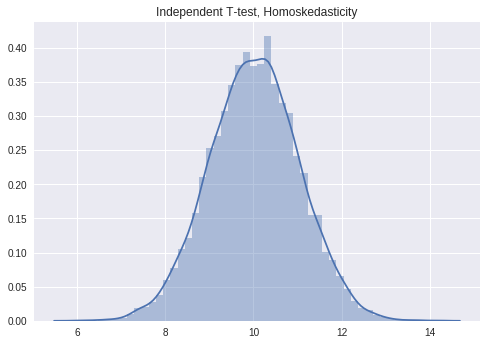

Ttest_indResult(statistic=706.5325745021204, pvalue=0.0)

In [5]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 분산이 동일한 두 집단의 독립표본 t 검정
# 대립가설: 두 집단의 표본평균이 다르다.
sample1 = stats.norm.rvs(size = 10000, loc = 5)
sample2 = stats.norm.rvs(size = 10000, loc = -5)
sample_diff = sample1 - np.mean(sample2)

sns.distplot(sample_diff)
plt.title('Independent T-test, Homoskedasticity')
plt.show()

# t 검정
stats.ttest_ind(sample1, sample2, equal_var = True)

### 분산의 가법성

* 검정통계량을 계산할 때 한 가지 주의할 사항이 있다. 표본평균 차이의 분포에서는 모평균은 각 모평균의 차이지만, 표준오차의 분산은 합이 된다는 점이다.

In [6]:
# 분산의 가법성
sample1 = stats.norm.rvs(loc = 0, scale = 2, size = 1000)
sample2 = stats.norm.rvs(loc = 0, scale = 1, size = 1000)

print("Standard deviation of sample1: ", np.std(sample1))
print("Standard deviation of sample2: ",np.std(sample2))
print("sqrt(Var(sample1) + Var(sample2)) = ", np.sqrt(np.var(sample1) + np.var(sample2)))
print("Standard deviation of sample1 + sample2: ",np.std(sample1 + sample2))

Standard deviation of sample1:  2.049210176804546
Standard deviation of sample2:  1.0250768862507638
sqrt(Var(sample1) + Var(sample2)) =  2.291297661030727
Standard deviation of sample1 + sample2:  2.290148153634864


### 검정통계량 (Z 분포)

* 모분산을 알고 있거나, 대표본인 경우에는 Z 분포를 이용한다.
* 표본평균 $\bar{X}$ 의 표준화변량 $Z_{\bar{X}}$ 는 $\frac{(\bar{X} - \mu)}{\sigma_{\bar{X}}}$ 이었으므로, 표본평균 $\bar{X_1}$ 와 $\bar{X_2}$ 의 차이도 마찬가지로 표준화할 수 있다(오차 분산에만 주의).
    * $Z_{\bar{X_1} - \bar{X_2}} = \frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sqrt{\sigma_{\bar{X_1}}^2 + \sigma_{\bar{X_2}}^2}} = \frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}} = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\sigma^2(\frac{1}{n_1} + \frac{1}{n_2})}}$
    
### 검정통계량 (t 분포)

* 모분산을 모르고 소표본인 경우에는 t 분포를 이용한다.
* Z 값과 다른 점은 모분산 $\sigma^2$ 가 불편분산 $\hat{\sigma}^2$ 가 된다는 점 뿐이다.
* 불편분산 $\hat{\sigma}^2$ 는 그룹 1에서도 그룹 2에서도 계산할 수 있기 때문에 이들의 자유도로 가중평균을 취한값(분산의 가중편균)을 이용한다.
* $ t_{\bar{X_1} - \bar{X_2}} = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\hat{\sigma}^2(\frac{1}{n_1} + \frac{1}{n_2})}}$ 단, $ \hat{\sigma}^2 = \frac{(n_1 - 1)\hat{\sigma_1}^2 + (n_2 - 1)\hat{\sigma_2}^2}{(n_1 - 1) + (n_2 - 1)} $
* 두 그룹 모두 같은 크기($n$) 라면 식은 아래와 같이 더 간단해진다.
* $ t_{\bar{X_1} - \bar{X_2}} = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{\hat{\sigma_1}^2 + \hat{\sigma_2}^2}{n}}} = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s_1^2 + s_2^2}{n - 1}}}$ 

### 귀무가설 판정 (t 분포)

* 검정통계량(z 또는 t)을 사용해 특정값과 표본평균을 검정할 때와 같은 절차로 검정한다. 여기서는 t 분포로 설명해두었다.
    * 자유도(degree of freedom)
        * 두 집단의 크기가 다를 경우: $ (n_1 - 1) + (n_2 - 1) $
        * 두 집단의 크기가 같은 경우: $ 2(n - 1) $
        
### 웰치(Welch) 의 검정 (등분산을 가정하지 않는 검정)

* 독립표본 평균 차이 검정통계량(z, t) 은 두 집단의 분산이 같다는 것이 전제이므로, 등분산검정 등에서 이를 가정할 수 없는 경우에는 **웰치(Welch) 검정** 을 이용한다.
* 검정 자체는 보통 t 검정과 같은 방법으로 할 쇼ㅜ 있지만 자유도 계산이 좀 복잡하다.
    * $ t'_{\bar{X_1} - \bar{X_2}} = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{\hat{\sigma_1}^2}{n_1} + \frac{\hat{\sigma_2}^2}{n_2}}}$,   $df = \frac{(\frac{\hat{\sigma_1}^2}{n_1} + \frac{\hat{\sigma_2}^2}{n_2})^2}{\frac{\hat{\sigma_1^4}}{n_1^2(n_1 - 1)} + \frac{\hat{\sigma_2^4}}{n_2^2(n_2 - 1)}}$ 

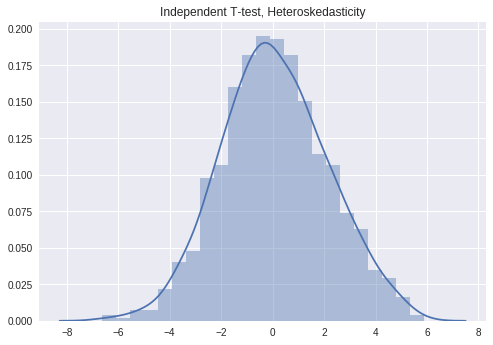

Ttest_indResult(statistic=1.1429674560564032, pvalue=0.2532392979727782)

In [7]:
# 분산이 다른 두 집단의 독립표본 t 검정
sample1 = stats.norm.rvs(loc = 0, scale = 2, size = 1000)
sample2 = stats.norm.rvs(loc = 0, scale = 1, size = 1000)
sample_diff = sample1 - np.mean(sample2)

sns.distplot(sample_diff)
plt.title('Independent T-test, Heteroskedasticity')
plt.show()

# t 검정
stats.ttest_ind(sample1, sample2, equal_var = False)

### 등분산검정 (F 검정)

* 두 집단의 분산이 같은지 아닌지를 판정한다.
* 두 집단이 정규분포를 따른다라는 가정 하에서는 두 집단의 불편분산의 비는 F 분포를 따른다.
    * $ F = \frac{\hat{\sigma_1}^2}{\hat{\sigma_2}^2} $
* 가설
    * $ H_0: \sigma_1^2 = \sigma_2^2 $, 두 집단의 모분산에는 **차이가 없다**.
    * $ H_1: \sigma_1^2 \ne \sigma_2^2 $, 두 집단의 모분산에는 **차이가 있다**.

### 검정통계량 (F 분포)

* F 분포
    * 두 확률변수 $V_1, V_2$ 가 각각 자유도가 $k_1, k_2$ 인 카이제곱분포를 따른다고 할 때, 다음과 같이 정의되는 확률변수 F 는 자유도가 $(k_1, k_2)$ 인 F 분포를 따른다고 한다.
    * $ F = \frac{V_1 / k_1}{V_2 / k_2} \sim F(k_1, k_2)$
* 등분산이라면 두 분산의 비율인 F 값은 1 근처의 값을 가질 것이고, 그렇지 않다면 아주 작거나 아주 큰(어차피 두 관계는 역수이기 때문에) 값을 가질 것이다.

### 귀무가설의 판정

* 상측에서 검정통계량 > 상한값, 하측에서 검정통계량 < 하한값, 혹은 p-value  <α 라면 귀무가설을 기각할 충분한 증거가 있다고 할 수 있다.

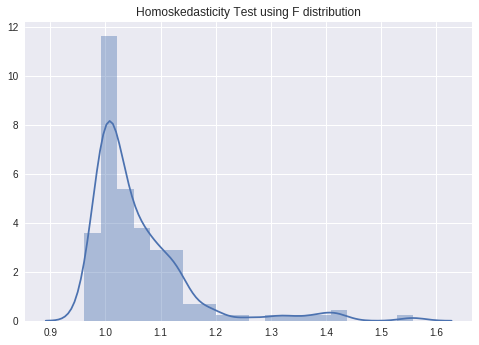

In [8]:
# 등분산검정
sample1 = stats.norm.rvs(loc = 0, scale = 1, size = 150) # 표준편차가 2
sample2 = stats.norm.rvs(loc = 0, scale = 3, size = 150) # 표준편차가 1

sample_f = (sample1 ** 2 / len(sample1) - 1) / (sample2 ** 2 / len(sample2) - 1)

sns.distplot(sample_f)
plt.title('Homoskedasticity Test using F distribution')
plt.show()

## 10. 평균 차이 검정 (2): 대응이 있는 두 집단의 경우

* 동일 개체를 두 조건으로 측정하기 때문에 개체 차이가 고려되어 보다 정확한 검정을 할 수 있다.
* 대응 표본 t 검정(Paired sample t test) 라고도 한다.


| 피험자 | 투약 전 (x$_1$) | 투약 후 (x$_2$) | 차이 d (d = x$_1$ - x$_2$) |
|------------------------------|
| A | 180 | 120 | 60 |
| B | 200 | 150 | 50 |
| C | 250 | 150 | 100 |
| 평균 |$\bar{x}_1$ = 210 | $\bar{x}_1$ = 140 | $\bar{d}$ = 70 |

* 대응이 없는 검정에서는 '표본평균의 차이'에 대한 분포였으나, 대응이 있는 검정에서는 '개별의 차이'에 대한 표본분포를 생각한다.

### 검정통계량 (t 분포)

* 개별 차이 $d$ 의 분포에서는 오차를 예측할 수 없으므로 표본 평균 차이 $\bar{d}$ 의 t 분포를 생각한다.
    * $ t_{\bar{d}} = \frac{\bar{d}}{\hat{\sigma} / \sqrt{n}} \approx \frac{\bar{d}}{s / \sqrt{n - 1}} $

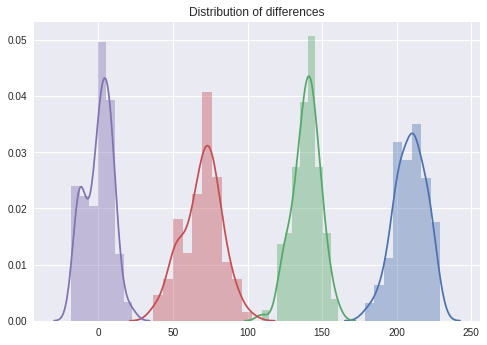

Ttest_relResult(statistic=52.6587698758965, pvalue=3.2711937349211003e-74)


In [10]:
# 대응표본 평균 차이 검정
sample1 = stats.norm.rvs(loc = 210, scale = 10, size = 100) # 투약 전
sample2 = stats.norm.rvs(loc = 140, scale = 10, size = 100) # 투약 후
sample_d = sample1 - sample2
sample_null = stats.norm.rvs(loc = 0, scale = 10, size = 100) # 귀무가설 하의 분포

# 각 개체별 차이의 분포
sns.distplot(sample1)
sns.distplot(sample2)
sns.distplot(sample_d)
sns.distplot(sample_null)
plt.title('Distribution of differences')
plt.show()

print(stats.ttest_rel(sample1, sample2))

In [11]:
# 세 가지 사례에 대한 예제
sample_before = np.array([180, 200, 250])
sample_after = np.array([120, 150, 150])

stats.ttest_rel(sample_before, sample_after) # p-value < 0.05: 귀무가설을 기각할 충분한 증거가 있다고 할 수 있다.

Ttest_relResult(statistic=4.58257569495584, pvalue=0.04446691409409084)

## 11. 비율 차이 검정: 대응이 없는 두 집단의 경우

* 두 집단 간의 모비율에 차이가 있는지 없는지를 판정한다.
* 소표본의 경우에는 정확확률검정(142쪽, 비모수 통계 > 피셔의 정확검정)을 이용한다.

### 가설

* 사례: 어떤 액정 패널 공장의 두 제조 라인에서 만든 제품

| | A 라인 | B 라인 |
|-----------------------------|
| 우량품 | 60장 | 80장 |
| 불량품 | 40장 | 120장 |
| 수율 | 60/100 = 0.6 | 80 / 200 = 0.4 |

* 이들 두 제품의 수율(표본비율)의 차이(0.6 - 0.4 = 0.2)가 오차 범위 내에 있는지 검토하는 것으로, 두 제조 라인의 실제 수율(모비율)에 차이가 있는지를 판정한다.
    * $ H_0: p_1 = p_2 $, 두 집단의 모비율에는 차이가 없다.
    * $ H_1: p_1 \neq p_2 $, 두 집단의 모비율에는 차이가 있다.

### 검정통계량 (Z 분포)

* 표본의 크기가 충분히 클 때, 두 집단의 표본비율차이($ \hat{p_1} - \hat{p_2} $) 는 정규분포를 따른다.
* 여기서는 그 표본비율의 차이를 표준화한 Z 통계량으로 설명한다.
    * $ Z_{\hat{p_1} - \hat{p_2}} = \frac{|{\hat{p_1} - \hat{p_2}|}}{\sqrt{\hat{p}(1 - \hat{p})(\frac{1}{n_1} + \frac{1}{n_2})}} $
    * 모표준오차: $ \sqrt{\hat{p}(1 - \hat{p})(\frac{1}{n_1} + \frac{1}{n_2})} $
    * $ \hat{p} = \frac{p_1 \times n_1 + p_2 \times n_2}{n_1 + n_2} \approx \frac{\bar{X_1} + \bar{X_2}}{n_1 + n_2} $
    
### 귀무가설의 판정

* 상측에서 검정통계량 > 상한값, 하측에서 검정통계량 < 하한값, 혹은 p-value <α 라면 귀무가설을 기각할 충분한 증거가 있다고 할 수 있다.

In [13]:
# 액정 패널 사례로 비율 차이에 대한 검정 해보기
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([60, 80])
nobs = np.array([100, 200])

stat, pval = proportions_ztest(counts, nobs)

print('p-value of the proportion test: ' + '{0:0.3f}'.format(pval))

p-value of the proportion test: 0.001


## 12. 뒤떨어지지 않음을 검정한다: 비열성 시험

* 통계적 검정에서는 '차이가 없다'고 하는 귀무가설을 채택할 수는 없다. 하지만 비용 절감을 우선시 하는 현대에는 선발제품과 후발제품의 품질에 큰 차이가 없다는 것을 증명하고 싶은 경우가 많이 있다. 그래서 일정 차이까지 떨어지는 것을 허용하고, 그보다 떨어지지 않는다는 것을 편측검정하는 방법이 있다.

### 목적

* 예를 들면 저비용의 후발제품을 판매하기 전에 평판이 좋았던 선발제품의 품질(유효율이나 강도 등)에 비해 그리 떨어지지 않는다는 것을 증명하고 싶은 경우 등이다.

### 가설 세우기

* 후발제품의 품질은 선발제품보다 $\Delta$ (**비열성 마진**: 허용할 수 있는 평균이나 비율의 차이) 만큼 떨어진다는 것을 귀무가설로 한다. 그리고 그것을 편측검정으로 기각하고 후발제품은 선발제품보다 $\Delta$ 이상은 떨어지지 않는다는 대립가설을 지지할 충분한 증거를 찾는 것을 목표로 한다.
* 가설
    * $ H_0: \mu_{2nd} = \mu_{1st} - \Delta $
    * $ H_1: \mu_{2nd} > \mu_{1st} - \Delta $

### 검정통계량

* 집단의 평균 차이(t 값) 비율 차이의 검정통계량(z 값) 의 분자에서 $\Delta$ 를 빼면 된다. 다만 비율의 경우는 분모의 표준오차 계산이 조금 복잡해진다.
* 뛰어난 그룹(선발제품)을 1로 하고, 품질이 $\Delta$ 이상은 떨어지지 않는다는 것을 증명하고 싶은 그룹(후발제품)을 2로 한다.
    * 독립표본 평균 차이 검정: $ t_{(\bar{X_1} - \bar{X_2}) - \Delta} = \frac{(\bar{X_1} - \bar{X_2}) - \Delta}{\sqrt{\hat{\sigma}^2(\frac{1}{n_1} + \frac{1}{n_2})}} $
    * 대응표본 평균 차이 검정: $ t_{\bar{d} - \Delta} = \frac{\bar{d} - \Delta}{\hat{\sigma} / \sqrt{n}} $
    * 독립표본 비율 차이 검정: $ z_{(\hat{p_1} - \hat{p_2}) - \Delta} = \frac{(\hat{p_1} - \hat{p_2}) - \Delta}{\sqrt{\frac{(\hat{p} - \Delta)(1 - \hat{p} + \Delta)}{n_1} + \frac{\hat{p}(1 - \hat{p})}{n_2}}} $

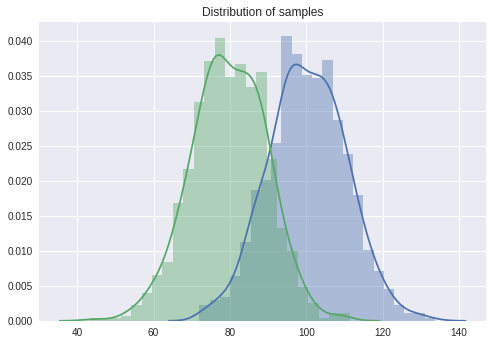

Ttest_indResult(statistic=1.1237929964226825, pvalue=0.2612358561621533)


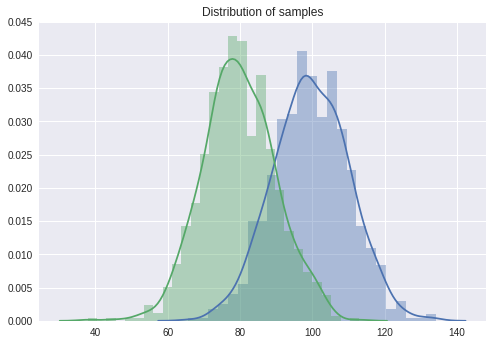

Ttest_indResult(statistic=10.626771098429602, pvalue=1.0704093372541964e-25)


In [22]:
# 독립표본 평균차이 검정: 비열성 시험, 차이가 없는 경우
sample1 = stats.norm.rvs(loc = 100, scale = 10, size = 1000)
sample2 = stats.norm.rvs(loc = 80, scale = 10, size = 1000)
delta = 20

# 표본의 분포 살펴보기
sns.distplot(sample1)
sns.distplot(sample2)
plt.title('Distribution of samples')

plt.show()

# 비열성 검정
print(stats.ttest_ind(sample1 - delta, sample2, equal_var = True)) # 검정 결과 p-value > 0.05 이므로 두 집단에 차이가 있다고 할 충분한 근거를 찾지 못했다.

# 독립표본 평균차이 검정: 비열성 시험, 차이가 있는 경우
sample1 = stats.norm.rvs(loc = 100, scale = 10, size = 1000)
sample2 = stats.norm.rvs(loc = 80, scale = 10, size = 1000)
delta = 15

# 표본의 분포 살펴보기
sns.distplot(sample1)
sns.distplot(sample2)
plt.title('Distribution of samples')

plt.show()

# 비열성 검정
print(stats.ttest_ind(sample1 - delta, sample2, equal_var = True)) # 검정 결과 p-value < 0.05 이므로 두 집단에 차이가 있다고 할 충분한 근거를 찾았다.